# 利用AdaBoost元算法提高分类性能

## AdaBoost（adaptive boosting）是自适应boosting的缩写。 
**其运行过程为：**

**训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量D。**

**首先在训练数据上训练出一个弱分类器并计算该分类器的错误率，然后再在同一数据集上再次训练弱分类器。**

**在第二次训练分类器时，重新调整样本权重，预测错误的样本权重将会增加。**

**同时，每个分类器都分配了一个alpha权重值，以此来得到所有分类器的最终分类结果。**

其中，错误率 
$$\begin{aligned}
\epsilon = \frac{错误分类结果数}{所有样本数}
\end{aligned}$$
而 
$$\begin{aligned}
\alpha = \frac {1}{2} ln(\frac {1 - \epsilon}{\epsilon})
\end{aligned}$$

计算出alpha值之后，我们对D进行更新，其计算如下。

如果分类正确：
$$\begin{aligned}
D_i^{(t+1)} = \frac {D_i^{(t)}e^{-\alpha}}{Sum(D)}
\end{aligned}$$
如果分类错误：
$$\begin{aligned}
D_i^{(t+1)} = \frac {D_i^{(t)}e^{\alpha}}{Sum(D)}
\end{aligned}$$

## 基于单层决策树构建弱分类器
单层决策树（decision stump）又称决策树桩，由于它仅基于单个特征来做决策，只有一次分裂过程，因此它只有一个树桩。

* 导入数据

In [1]:
from numpy import *

def load_simpdata():
    datmat = matrix([[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    class_labels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datmat,class_labels

In [2]:
datmat, labels = load_simpdata()

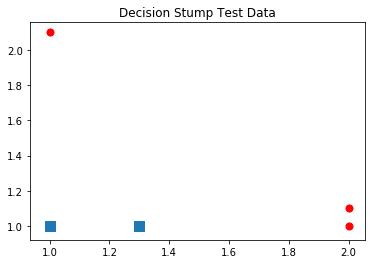

In [3]:
import matplotlib.pyplot as plt

xcord0 = []
ycord0 = []
xcord1 = []
ycord1 = []
markers =[]
colors =[]

for i in range(len(labels)):
    if labels[i]==1.0:
        xcord1.append(datmat[i,0]), ycord1.append(datmat[i,1])
    else:
        xcord0.append(datmat[i,0]), ycord0.append(datmat[i,1])
fig = plt.figure()
ax = fig.add_subplot(111)       
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('Decision Stump Test Data')
plt.show()

* 建立单层决策树

        将min_err设为无穷大   
            对数据集中的每个特征
                对每个步长
                    对每个不等号
                        建立一颗单层决策树并利用加权数据集对它进行测试
                        如果错误率低于min_err则将当前决策树设为最佳单层决策树
        返回最佳决策树

In [4]:
import numpy as np
def stump_classfiy(datamat, dimen, thresh_val, thresh_ineq): 
    ret_array = np.ones((np.shape(datamat)[0], 1))
    if thresh_ineq == 'lt':
        ret_array[datamat[:, dimen] <= thresh_val] = -1.0
    else:
        ret_array[datamat[:, dimen] > thresh_val] = -1.0
    return ret_array

In [5]:
def build_stump(data_arr, class_labels, D):
    datamat = np.mat(data_arr)
    labelmat = np.mat(class_labels).T
    m, n = np.shape(datamat)
    num_steps = 10.0
    best_stump = {}
    best_class_est = np.mat(np.zeros((m, 1)))
    min_err = np.inf
    for i in range(n):
        range_min = min(datamat[:, i])
        range_max = max(datamat[:, i])
        step_size = (range_max - range_min) / num_steps
        for j in range(-1, int(num_steps)+1):
            for inequal in ['lt', 'gt']:
                thresh_val = (range_min + float(j) * step_size)
                predict_val = stump_classfiy(datamat, i, thresh_val, inequal)
                err_mat = np.mat(np.ones((m, 1)))
                err_mat[predict_val == labelmat] = 0
                weight_err = D.T * err_mat
                print('split: dim %d, thresh %.2f, thresh ineqal: %s, the weight error: %.3f' %(i, thresh_val, inequal, weight_err))
                if weight_err < min_err:
                    min_err = weight_err
                    best_class_est = predict_val.copy()
                    best_stump['dim'] = i
                    best_stump['thresh'] = thresh_val
                    best_stump['ineq'] = inequal
    return best_stump, min_err, best_class_est

In [6]:
D = np.mat(np.ones((5, 1)) / 5)
D

matrix([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2]])

In [7]:
build_stump(datmat, labels, D)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.50, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh

({'dim': 0, 'thresh': matrix([[1.3]]), 'ineq': 'lt'},
 matrix([[0.2]]),
 array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

## AdaBoosting算法的实现

伪代码：

    对每次迭代
        利用build_stump()函数找到最佳单层决策树
        将最佳单层决策树加到单层决策树数组
        计算alpha
        计算新的权重向量D
        更新累计类别估计值
        如果错误率为0则退出

In [8]:
def adaboost_train(data_arr, class_labels, numit=40):
    weak_class_arr = []
    m = np.shape(data_arr)[0]
    D = np.mat(np.ones((m, 1)) / m)
    aggclass_est = np.mat(np.zeros((m, 1)))
    for i in range(numit):
        best_stump, error, class_est = build_stump(data_arr, class_labels, D)
        print('D:', D.T)
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))
        best_stump['alpha'] = alpha
        weak_class_arr.append(best_stump)
        print('此次分类结果：', class_est.T)
        expon = np.multiply(-1 * alpha * np.mat(class_labels).T, class_est)
        D = np.multiply(D, np.exp(expon))
        D = D/D.sum()
        aggclass_est += alpha * class_est
        print('alpha*predic_val:', aggclass_est.T)
        agg_error = np.multiply(sign(aggclass_est) != np.mat(class_labels).T, np.ones((m, 1)))
        error_rate = agg_error.sum() / m
        print('total error;', error_rate)
        if error_rate == 0.0:
            break
    return weak_class_arr

In [9]:
adaboost_train(datmat, labels, 9)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.50, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh

[{'dim': 0,
  'thresh': matrix([[1.3]]),
  'ineq': 'lt',
  'alpha': 0.6931471805599453},
 {'dim': 1,
  'thresh': matrix([[1.]]),
  'ineq': 'lt',
  'alpha': 0.9729550745276565},
 {'dim': 0,
  'thresh': matrix([[0.9]]),
  'ineq': 'lt',
  'alpha': 0.8958797346140273}]

## 测试算法

In [10]:
 def ada_classfiy(data2class, classfier_arr):
    datamat = np.mat(data2class)
    m = np.shape(datamat)[0]
    agg_class_est = np.mat(np.zeros((m, 1)))
    for i in range(len(classfier_arr)):
        class_est = stump_classfiy(datamat, classfier_arr[i]['dim'], classfier_arr[i]['thresh'],classfier_arr[i]['ineq'])
        agg_class_est += classfier_arr[i]['alpha'] * class_est
        print('agg_class_est:', agg_class_est)
    return sign(agg_class_est)

In [11]:
classfiy_arr = adaboost_train(datmat, labels, 30)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error: 0.200
split: dim 0, thresh 1.50, thresh ineqal: gt, the weight error: 0.800
split: dim 0, thresh

In [12]:
ada_classfiy([0, 0], classfiy_arr)

agg_class_est: [[-0.69314718]]
agg_class_est: [[-1.66610226]]
agg_class_est: [[-2.56198199]]


matrix([[-1.]])

In [13]:
ada_classfiy([5, 5], classfiy_arr)

agg_class_est: [[0.69314718]]
agg_class_est: [[1.66610226]]
agg_class_est: [[2.56198199]]


matrix([[1.]])

## 示例：在一个难数据集上应用AdaBoost

* 导入数据

In [14]:
def load_dataset(filename):
    num_feat = len(open(filename).readline().split('\t'))
    datamat = []
    labelmat = []
    fr = open(filename)
    for line in fr.readlines():
        line_arr = []
        cur_line = line.strip().split('\t')
        for i in range(num_feat-1):
            line_arr.append(float(cur_line[i]))
        datamat.append(line_arr)
        labelmat.append(float(cur_line[-1]))
    return datamat, labelmat

In [15]:
data_arr, label_arr = load_dataset('horseColicTraining2.txt')

* 训练算法，利用adaboost_train()训练出一系列的分类器

In [16]:
classifiy_arr = adaboost_train(data_arr, label_arr, 10)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weight error: 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weight error: 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error: 0.438
split: dim 0, thresh 1.50, thresh ineqal: gt, the weight error: 0.562
split: dim 0, thresh

split: dim 10, thresh -0.40, thresh ineqal: lt, the weight error: 0.405
split: dim 10, thresh -0.40, thresh ineqal: gt, the weight error: 0.595
split: dim 10, thresh 0.00, thresh ineqal: lt, the weight error: 0.405
split: dim 10, thresh 0.00, thresh ineqal: gt, the weight error: 0.595
split: dim 10, thresh 0.40, thresh ineqal: lt, the weight error: 0.405
split: dim 10, thresh 0.40, thresh ineqal: gt, the weight error: 0.595
split: dim 10, thresh 0.80, thresh ineqal: lt, the weight error: 0.405
split: dim 10, thresh 0.80, thresh ineqal: gt, the weight error: 0.595
split: dim 10, thresh 1.20, thresh ineqal: lt, the weight error: 0.502
split: dim 10, thresh 1.20, thresh ineqal: gt, the weight error: 0.498
split: dim 10, thresh 1.60, thresh ineqal: lt, the weight error: 0.502
split: dim 10, thresh 1.60, thresh ineqal: gt, the weight error: 0.498
split: dim 10, thresh 2.00, thresh ineqal: lt, the weight error: 0.535
split: dim 10, thresh 2.00, thresh ineqal: gt, the weight error: 0.465
spli

split: dim 16, thresh 2.50, thresh ineqal: gt, the weight error: 0.405
split: dim 16, thresh 3.00, thresh ineqal: lt, the weight error: 0.625
split: dim 16, thresh 3.00, thresh ineqal: gt, the weight error: 0.375
split: dim 16, thresh 3.50, thresh ineqal: lt, the weight error: 0.625
split: dim 16, thresh 3.50, thresh ineqal: gt, the weight error: 0.375
split: dim 16, thresh 4.00, thresh ineqal: lt, the weight error: 0.635
split: dim 16, thresh 4.00, thresh ineqal: gt, the weight error: 0.365
split: dim 16, thresh 4.50, thresh ineqal: lt, the weight error: 0.635
split: dim 16, thresh 4.50, thresh ineqal: gt, the weight error: 0.365
split: dim 16, thresh 5.00, thresh ineqal: lt, the weight error: 0.595
split: dim 16, thresh 5.00, thresh ineqal: gt, the weight error: 0.405
split: dim 17, thresh -7.50, thresh ineqal: lt, the weight error: 0.405
split: dim 17, thresh -7.50, thresh ineqal: gt, the weight error: 0.595
split: dim 17, thresh 0.00, thresh ineqal: lt, the weight error: 0.395
spli

split: dim 3, thresh -18.40, thresh ineqal: lt, the weight error: 0.506
split: dim 3, thresh -18.40, thresh ineqal: gt, the weight error: 0.494
split: dim 3, thresh 0.00, thresh ineqal: lt, the weight error: 0.503
split: dim 3, thresh 0.00, thresh ineqal: gt, the weight error: 0.497
split: dim 3, thresh 18.40, thresh ineqal: lt, the weight error: 0.503
split: dim 3, thresh 18.40, thresh ineqal: gt, the weight error: 0.497
split: dim 3, thresh 36.80, thresh ineqal: lt, the weight error: 0.497
split: dim 3, thresh 36.80, thresh ineqal: gt, the weight error: 0.503
split: dim 3, thresh 55.20, thresh ineqal: lt, the weight error: 0.644
split: dim 3, thresh 55.20, thresh ineqal: gt, the weight error: 0.356
split: dim 3, thresh 73.60, thresh ineqal: lt, the weight error: 0.650
split: dim 3, thresh 73.60, thresh ineqal: gt, the weight error: 0.350
split: dim 3, thresh 92.00, thresh ineqal: lt, the weight error: 0.561
split: dim 3, thresh 92.00, thresh ineqal: gt, the weight error: 0.439
split:

split: dim 8, thresh 1.20, thresh ineqal: lt, the weight error: 0.601
split: dim 8, thresh 1.20, thresh ineqal: gt, the weight error: 0.399
split: dim 8, thresh 1.50, thresh ineqal: lt, the weight error: 0.601
split: dim 8, thresh 1.50, thresh ineqal: gt, the weight error: 0.399
split: dim 8, thresh 1.80, thresh ineqal: lt, the weight error: 0.601
split: dim 8, thresh 1.80, thresh ineqal: gt, the weight error: 0.399
split: dim 8, thresh 2.10, thresh ineqal: lt, the weight error: 0.494
split: dim 8, thresh 2.10, thresh ineqal: gt, the weight error: 0.506
split: dim 8, thresh 2.40, thresh ineqal: lt, the weight error: 0.494
split: dim 8, thresh 2.40, thresh ineqal: gt, the weight error: 0.506
split: dim 8, thresh 2.70, thresh ineqal: lt, the weight error: 0.494
split: dim 8, thresh 2.70, thresh ineqal: gt, the weight error: 0.506
split: dim 8, thresh 3.00, thresh ineqal: lt, the weight error: 0.494
split: dim 8, thresh 3.00, thresh ineqal: gt, the weight error: 0.506
split: dim 9, thresh

split: dim 14, thresh 3.75, thresh ineqal: lt, the weight error: 0.546
split: dim 14, thresh 3.75, thresh ineqal: gt, the weight error: 0.454
split: dim 14, thresh 4.50, thresh ineqal: lt, the weight error: 0.528
split: dim 14, thresh 4.50, thresh ineqal: gt, the weight error: 0.472
split: dim 14, thresh 5.25, thresh ineqal: lt, the weight error: 0.525
split: dim 14, thresh 5.25, thresh ineqal: gt, the weight error: 0.475
split: dim 14, thresh 6.00, thresh ineqal: lt, the weight error: 0.522
split: dim 14, thresh 6.00, thresh ineqal: gt, the weight error: 0.478
split: dim 14, thresh 6.75, thresh ineqal: lt, the weight error: 0.527
split: dim 14, thresh 6.75, thresh ineqal: gt, the weight error: 0.473
split: dim 14, thresh 7.50, thresh ineqal: lt, the weight error: 0.494
split: dim 14, thresh 7.50, thresh ineqal: gt, the weight error: 0.506
split: dim 15, thresh -0.40, thresh ineqal: lt, the weight error: 0.506
split: dim 15, thresh -0.40, thresh ineqal: gt, the weight error: 0.494
spli

  0.00588235 0.00233645 0.00233645 0.00233645 0.00588235]]
此次分类结果： [[ 1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
   1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.
   1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.
   1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1.
   1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
   1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.

split: dim 4, thresh -9.60, thresh ineqal: lt, the weight error: 0.593
split: dim 4, thresh -9.60, thresh ineqal: gt, the weight error: 0.407
split: dim 4, thresh 0.00, thresh ineqal: lt, the weight error: 0.541
split: dim 4, thresh 0.00, thresh ineqal: gt, the weight error: 0.459
split: dim 4, thresh 9.60, thresh ineqal: lt, the weight error: 0.546
split: dim 4, thresh 9.60, thresh ineqal: gt, the weight error: 0.454
split: dim 4, thresh 19.20, thresh ineqal: lt, the weight error: 0.562
split: dim 4, thresh 19.20, thresh ineqal: gt, the weight error: 0.438
split: dim 4, thresh 28.80, thresh ineqal: lt, the weight error: 0.464
split: dim 4, thresh 28.80, thresh ineqal: gt, the weight error: 0.536
split: dim 4, thresh 38.40, thresh ineqal: lt, the weight error: 0.447
split: dim 4, thresh 38.40, thresh ineqal: gt, the weight error: 0.553
split: dim 4, thresh 48.00, thresh ineqal: lt, the weight error: 0.426
split: dim 4, thresh 48.00, thresh ineqal: gt, the weight error: 0.574
split: dim

split: dim 12, thresh -0.30, thresh ineqal: lt, the weight error: 0.593
split: dim 12, thresh -0.30, thresh ineqal: gt, the weight error: 0.407
split: dim 12, thresh 0.00, thresh ineqal: lt, the weight error: 0.500
split: dim 12, thresh 0.00, thresh ineqal: gt, the weight error: 0.500
split: dim 12, thresh 0.30, thresh ineqal: lt, the weight error: 0.500
split: dim 12, thresh 0.30, thresh ineqal: gt, the weight error: 0.500
split: dim 12, thresh 0.60, thresh ineqal: lt, the weight error: 0.500
split: dim 12, thresh 0.60, thresh ineqal: gt, the weight error: 0.500
split: dim 12, thresh 0.90, thresh ineqal: lt, the weight error: 0.500
split: dim 12, thresh 0.90, thresh ineqal: gt, the weight error: 0.500
split: dim 12, thresh 1.20, thresh ineqal: lt, the weight error: 0.441
split: dim 12, thresh 1.20, thresh ineqal: gt, the weight error: 0.559
split: dim 12, thresh 1.50, thresh ineqal: lt, the weight error: 0.441
split: dim 12, thresh 1.50, thresh ineqal: gt, the weight error: 0.559
spli

split: dim 19, thresh -0.30, thresh ineqal: lt, the weight error: 0.593
split: dim 19, thresh -0.30, thresh ineqal: gt, the weight error: 0.407
split: dim 19, thresh 0.00, thresh ineqal: lt, the weight error: 0.512
split: dim 19, thresh 0.00, thresh ineqal: gt, the weight error: 0.488
split: dim 19, thresh 0.30, thresh ineqal: lt, the weight error: 0.512
split: dim 19, thresh 0.30, thresh ineqal: gt, the weight error: 0.488
split: dim 19, thresh 0.60, thresh ineqal: lt, the weight error: 0.512
split: dim 19, thresh 0.60, thresh ineqal: gt, the weight error: 0.488
split: dim 19, thresh 0.90, thresh ineqal: lt, the weight error: 0.512
split: dim 19, thresh 0.90, thresh ineqal: gt, the weight error: 0.488
split: dim 19, thresh 1.20, thresh ineqal: lt, the weight error: 0.533
split: dim 19, thresh 1.20, thresh ineqal: gt, the weight error: 0.467
split: dim 19, thresh 1.50, thresh ineqal: lt, the weight error: 0.533
split: dim 19, thresh 1.50, thresh ineqal: gt, the weight error: 0.467
spli

  -0.1376298  -0.43598966 -1.06095456  0.4873351   1.06095456]]
total error; 0.24749163879598662
split: dim 0, thresh 0.90, thresh ineqal: lt, the weight error: 0.553
split: dim 0, thresh 0.90, thresh ineqal: gt, the weight error: 0.447
split: dim 0, thresh 1.00, thresh ineqal: lt, the weight error: 0.452
split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.548
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.452
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.548
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.452
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.548
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.452
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.548
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.452
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.548
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error:

split: dim 9, thresh -0.50, thresh ineqal: gt, the weight error: 0.447
split: dim 9, thresh 0.00, thresh ineqal: lt, the weight error: 0.461
split: dim 9, thresh 0.00, thresh ineqal: gt, the weight error: 0.539
split: dim 9, thresh 0.50, thresh ineqal: lt, the weight error: 0.461
split: dim 9, thresh 0.50, thresh ineqal: gt, the weight error: 0.539
split: dim 9, thresh 1.00, thresh ineqal: lt, the weight error: 0.487
split: dim 9, thresh 1.00, thresh ineqal: gt, the weight error: 0.513
split: dim 9, thresh 1.50, thresh ineqal: lt, the weight error: 0.487
split: dim 9, thresh 1.50, thresh ineqal: gt, the weight error: 0.513
split: dim 9, thresh 2.00, thresh ineqal: lt, the weight error: 0.440
split: dim 9, thresh 2.00, thresh ineqal: gt, the weight error: 0.560
split: dim 9, thresh 2.50, thresh ineqal: lt, the weight error: 0.440
split: dim 9, thresh 2.50, thresh ineqal: gt, the weight error: 0.560
split: dim 9, thresh 3.00, thresh ineqal: lt, the weight error: 0.457
split: dim 9, thres

split: dim 15, thresh 1.60, thresh ineqal: gt, the weight error: 0.544
split: dim 15, thresh 2.00, thresh ineqal: lt, the weight error: 0.455
split: dim 15, thresh 2.00, thresh ineqal: gt, the weight error: 0.545
split: dim 15, thresh 2.40, thresh ineqal: lt, the weight error: 0.455
split: dim 15, thresh 2.40, thresh ineqal: gt, the weight error: 0.545
split: dim 15, thresh 2.80, thresh ineqal: lt, the weight error: 0.455
split: dim 15, thresh 2.80, thresh ineqal: gt, the weight error: 0.545
split: dim 15, thresh 3.20, thresh ineqal: lt, the weight error: 0.488
split: dim 15, thresh 3.20, thresh ineqal: gt, the weight error: 0.512
split: dim 15, thresh 3.60, thresh ineqal: lt, the weight error: 0.488
split: dim 15, thresh 3.60, thresh ineqal: gt, the weight error: 0.512
split: dim 15, thresh 4.00, thresh ineqal: lt, the weight error: 0.447
split: dim 15, thresh 4.00, thresh ineqal: gt, the weight error: 0.553
split: dim 16, thresh -0.50, thresh ineqal: lt, the weight error: 0.553
split

split: dim 0, thresh 1.00, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.10, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.10, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.20, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.20, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.30, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.30, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.40, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.40, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.50, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.50, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.60, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh 1.60, thresh ineqal: gt, the weight error: 0.533
split: dim 0, thresh 1.70, thresh ineqal: lt, the weight error: 0.467
split: dim 0, thresh

split: dim 6, thresh 4.00, thresh ineqal: lt, the weight error: 0.526
split: dim 6, thresh 4.00, thresh ineqal: gt, the weight error: 0.474
split: dim 7, thresh -0.60, thresh ineqal: lt, the weight error: 0.474
split: dim 7, thresh -0.60, thresh ineqal: gt, the weight error: 0.526
split: dim 7, thresh 0.00, thresh ineqal: lt, the weight error: 0.442
split: dim 7, thresh 0.00, thresh ineqal: gt, the weight error: 0.558
split: dim 7, thresh 0.60, thresh ineqal: lt, the weight error: 0.442
split: dim 7, thresh 0.60, thresh ineqal: gt, the weight error: 0.558
split: dim 7, thresh 1.20, thresh ineqal: lt, the weight error: 0.544
split: dim 7, thresh 1.20, thresh ineqal: gt, the weight error: 0.456
split: dim 7, thresh 1.80, thresh ineqal: lt, the weight error: 0.544
split: dim 7, thresh 1.80, thresh ineqal: gt, the weight error: 0.456
split: dim 7, thresh 2.40, thresh ineqal: lt, the weight error: 0.542
split: dim 7, thresh 2.40, thresh ineqal: gt, the weight error: 0.458
split: dim 7, thre

split: dim 13, thresh 3.00, thresh ineqal: gt, the weight error: 0.474
split: dim 14, thresh -0.75, thresh ineqal: lt, the weight error: 0.474
split: dim 14, thresh -0.75, thresh ineqal: gt, the weight error: 0.526
split: dim 14, thresh 0.00, thresh ineqal: lt, the weight error: 0.558
split: dim 14, thresh 0.00, thresh ineqal: gt, the weight error: 0.442
split: dim 14, thresh 0.75, thresh ineqal: lt, the weight error: 0.558
split: dim 14, thresh 0.75, thresh ineqal: gt, the weight error: 0.442
split: dim 14, thresh 1.50, thresh ineqal: lt, the weight error: 0.551
split: dim 14, thresh 1.50, thresh ineqal: gt, the weight error: 0.449
split: dim 14, thresh 2.25, thresh ineqal: lt, the weight error: 0.544
split: dim 14, thresh 2.25, thresh ineqal: gt, the weight error: 0.456
split: dim 14, thresh 3.00, thresh ineqal: lt, the weight error: 0.554
split: dim 14, thresh 3.00, thresh ineqal: gt, the weight error: 0.446
split: dim 14, thresh 3.75, thresh ineqal: lt, the weight error: 0.548
spli

split: dim 19, thresh 3.00, thresh ineqal: gt, the weight error: 0.474
split: dim 20, thresh -1.01, thresh ineqal: lt, the weight error: 0.474
split: dim 20, thresh -1.01, thresh ineqal: gt, the weight error: 0.526
split: dim 20, thresh 0.00, thresh ineqal: lt, the weight error: 0.539
split: dim 20, thresh 0.00, thresh ineqal: gt, the weight error: 0.461
split: dim 20, thresh 1.01, thresh ineqal: lt, the weight error: 0.547
split: dim 20, thresh 1.01, thresh ineqal: gt, the weight error: 0.453
split: dim 20, thresh 2.02, thresh ineqal: lt, the weight error: 0.532
split: dim 20, thresh 2.02, thresh ineqal: gt, the weight error: 0.468
split: dim 20, thresh 3.03, thresh ineqal: lt, the weight error: 0.550
split: dim 20, thresh 3.03, thresh ineqal: gt, the weight error: 0.450
split: dim 20, thresh 4.04, thresh ineqal: lt, the weight error: 0.536
split: dim 20, thresh 4.04, thresh ineqal: gt, the weight error: 0.464
split: dim 20, thresh 5.05, thresh ineqal: lt, the weight error: 0.534
spli

split: dim 3, thresh -18.40, thresh ineqal: lt, the weight error: 0.538
split: dim 3, thresh -18.40, thresh ineqal: gt, the weight error: 0.462
split: dim 3, thresh 0.00, thresh ineqal: lt, the weight error: 0.506
split: dim 3, thresh 0.00, thresh ineqal: gt, the weight error: 0.494
split: dim 3, thresh 18.40, thresh ineqal: lt, the weight error: 0.506
split: dim 3, thresh 18.40, thresh ineqal: gt, the weight error: 0.494
split: dim 3, thresh 36.80, thresh ineqal: lt, the weight error: 0.490
split: dim 3, thresh 36.80, thresh ineqal: gt, the weight error: 0.510
split: dim 3, thresh 55.20, thresh ineqal: lt, the weight error: 0.530
split: dim 3, thresh 55.20, thresh ineqal: gt, the weight error: 0.470
split: dim 3, thresh 73.60, thresh ineqal: lt, the weight error: 0.553
split: dim 3, thresh 73.60, thresh ineqal: gt, the weight error: 0.447
split: dim 3, thresh 92.00, thresh ineqal: lt, the weight error: 0.478
split: dim 3, thresh 92.00, thresh ineqal: gt, the weight error: 0.522
split:

split: dim 10, thresh -0.40, thresh ineqal: lt, the weight error: 0.538
split: dim 10, thresh -0.40, thresh ineqal: gt, the weight error: 0.462
split: dim 10, thresh 0.00, thresh ineqal: lt, the weight error: 0.500
split: dim 10, thresh 0.00, thresh ineqal: gt, the weight error: 0.500
split: dim 10, thresh 0.40, thresh ineqal: lt, the weight error: 0.500
split: dim 10, thresh 0.40, thresh ineqal: gt, the weight error: 0.500
split: dim 10, thresh 0.80, thresh ineqal: lt, the weight error: 0.500
split: dim 10, thresh 0.80, thresh ineqal: gt, the weight error: 0.500
split: dim 10, thresh 1.20, thresh ineqal: lt, the weight error: 0.533
split: dim 10, thresh 1.20, thresh ineqal: gt, the weight error: 0.467
split: dim 10, thresh 1.60, thresh ineqal: lt, the weight error: 0.533
split: dim 10, thresh 1.60, thresh ineqal: gt, the weight error: 0.467
split: dim 10, thresh 2.00, thresh ineqal: lt, the weight error: 0.538
split: dim 10, thresh 2.00, thresh ineqal: gt, the weight error: 0.462
spli

split: dim 15, thresh 1.20, thresh ineqal: gt, the weight error: 0.516
split: dim 15, thresh 1.60, thresh ineqal: lt, the weight error: 0.484
split: dim 15, thresh 1.60, thresh ineqal: gt, the weight error: 0.516
split: dim 15, thresh 2.00, thresh ineqal: lt, the weight error: 0.484
split: dim 15, thresh 2.00, thresh ineqal: gt, the weight error: 0.516
split: dim 15, thresh 2.40, thresh ineqal: lt, the weight error: 0.484
split: dim 15, thresh 2.40, thresh ineqal: gt, the weight error: 0.516
split: dim 15, thresh 2.80, thresh ineqal: lt, the weight error: 0.484
split: dim 15, thresh 2.80, thresh ineqal: gt, the weight error: 0.516
split: dim 15, thresh 3.20, thresh ineqal: lt, the weight error: 0.511
split: dim 15, thresh 3.20, thresh ineqal: gt, the weight error: 0.489
split: dim 15, thresh 3.60, thresh ineqal: lt, the weight error: 0.511
split: dim 15, thresh 3.60, thresh ineqal: gt, the weight error: 0.489
split: dim 15, thresh 4.00, thresh ineqal: lt, the weight error: 0.462
split:

split: dim 20, thresh 2.02, thresh ineqal: lt, the weight error: 0.497
split: dim 20, thresh 2.02, thresh ineqal: gt, the weight error: 0.503
split: dim 20, thresh 3.03, thresh ineqal: lt, the weight error: 0.504
split: dim 20, thresh 3.03, thresh ineqal: gt, the weight error: 0.496
split: dim 20, thresh 4.04, thresh ineqal: lt, the weight error: 0.485
split: dim 20, thresh 4.04, thresh ineqal: gt, the weight error: 0.515
split: dim 20, thresh 5.05, thresh ineqal: lt, the weight error: 0.477
split: dim 20, thresh 5.05, thresh ineqal: gt, the weight error: 0.523
split: dim 20, thresh 6.06, thresh ineqal: lt, the weight error: 0.471
split: dim 20, thresh 6.06, thresh ineqal: gt, the weight error: 0.529
split: dim 20, thresh 7.07, thresh ineqal: lt, the weight error: 0.479
split: dim 20, thresh 7.07, thresh ineqal: gt, the weight error: 0.521
split: dim 20, thresh 8.08, thresh ineqal: lt, the weight error: 0.473
split: dim 20, thresh 8.08, thresh ineqal: gt, the weight error: 0.527
split:

split: dim 1, thresh 5.80, thresh ineqal: gt, the weight error: 0.519
split: dim 1, thresh 6.60, thresh ineqal: lt, the weight error: 0.481
split: dim 1, thresh 6.60, thresh ineqal: gt, the weight error: 0.519
split: dim 1, thresh 7.40, thresh ineqal: lt, the weight error: 0.481
split: dim 1, thresh 7.40, thresh ineqal: gt, the weight error: 0.519
split: dim 1, thresh 8.20, thresh ineqal: lt, the weight error: 0.481
split: dim 1, thresh 8.20, thresh ineqal: gt, the weight error: 0.519
split: dim 1, thresh 9.00, thresh ineqal: lt, the weight error: 0.457
split: dim 1, thresh 9.00, thresh ineqal: gt, the weight error: 0.543
split: dim 2, thresh -4.08, thresh ineqal: lt, the weight error: 0.543
split: dim 2, thresh -4.08, thresh ineqal: gt, the weight error: 0.457
split: dim 2, thresh 0.00, thresh ineqal: lt, the weight error: 0.502
split: dim 2, thresh 0.00, thresh ineqal: gt, the weight error: 0.498
split: dim 2, thresh 4.08, thresh ineqal: lt, the weight error: 0.502
split: dim 2, thre

split: dim 6, thresh 1.60, thresh ineqal: gt, the weight error: 0.481
split: dim 6, thresh 2.00, thresh ineqal: lt, the weight error: 0.507
split: dim 6, thresh 2.00, thresh ineqal: gt, the weight error: 0.493
split: dim 6, thresh 2.40, thresh ineqal: lt, the weight error: 0.507
split: dim 6, thresh 2.40, thresh ineqal: gt, the weight error: 0.493
split: dim 6, thresh 2.80, thresh ineqal: lt, the weight error: 0.507
split: dim 6, thresh 2.80, thresh ineqal: gt, the weight error: 0.493
split: dim 6, thresh 3.20, thresh ineqal: lt, the weight error: 0.470
split: dim 6, thresh 3.20, thresh ineqal: gt, the weight error: 0.530
split: dim 6, thresh 3.60, thresh ineqal: lt, the weight error: 0.470
split: dim 6, thresh 3.60, thresh ineqal: gt, the weight error: 0.530
split: dim 6, thresh 4.00, thresh ineqal: lt, the weight error: 0.457
split: dim 6, thresh 4.00, thresh ineqal: gt, the weight error: 0.543
split: dim 7, thresh -0.60, thresh ineqal: lt, the weight error: 0.543
split: dim 7, thres

split: dim 20, thresh -1.01, thresh ineqal: lt, the weight error: 0.543
split: dim 20, thresh -1.01, thresh ineqal: gt, the weight error: 0.457
split: dim 20, thresh 0.00, thresh ineqal: lt, the weight error: 0.524
split: dim 20, thresh 0.00, thresh ineqal: gt, the weight error: 0.476
split: dim 20, thresh 1.01, thresh ineqal: lt, the weight error: 0.522
split: dim 20, thresh 1.01, thresh ineqal: gt, the weight error: 0.478
split: dim 20, thresh 2.02, thresh ineqal: lt, the weight error: 0.487
split: dim 20, thresh 2.02, thresh ineqal: gt, the weight error: 0.513
split: dim 20, thresh 3.03, thresh ineqal: lt, the weight error: 0.494
split: dim 20, thresh 3.03, thresh ineqal: gt, the weight error: 0.506
split: dim 20, thresh 4.04, thresh ineqal: lt, the weight error: 0.476
split: dim 20, thresh 4.04, thresh ineqal: gt, the weight error: 0.524
split: dim 20, thresh 5.05, thresh ineqal: lt, the weight error: 0.472
split: dim 20, thresh 5.05, thresh ineqal: gt, the weight error: 0.528
spli

split: dim 3, thresh 92.00, thresh ineqal: gt, the weight error: 0.539
split: dim 3, thresh 110.40, thresh ineqal: lt, the weight error: 0.493
split: dim 3, thresh 110.40, thresh ineqal: gt, the weight error: 0.507
split: dim 3, thresh 128.80, thresh ineqal: lt, the weight error: 0.485
split: dim 3, thresh 128.80, thresh ineqal: gt, the weight error: 0.515
split: dim 3, thresh 147.20, thresh ineqal: lt, the weight error: 0.484
split: dim 3, thresh 147.20, thresh ineqal: gt, the weight error: 0.516
split: dim 3, thresh 165.60, thresh ineqal: lt, the weight error: 0.474
split: dim 3, thresh 165.60, thresh ineqal: gt, the weight error: 0.526
split: dim 3, thresh 184.00, thresh ineqal: lt, the weight error: 0.471
split: dim 3, thresh 184.00, thresh ineqal: gt, the weight error: 0.529
split: dim 4, thresh -9.60, thresh ineqal: lt, the weight error: 0.529
split: dim 4, thresh -9.60, thresh ineqal: gt, the weight error: 0.471
split: dim 4, thresh 0.00, thresh ineqal: lt, the weight error: 0.4

split: dim 10, thresh -0.40, thresh ineqal: lt, the weight error: 0.529
split: dim 10, thresh -0.40, thresh ineqal: gt, the weight error: 0.471
split: dim 10, thresh 0.00, thresh ineqal: lt, the weight error: 0.484
split: dim 10, thresh 0.00, thresh ineqal: gt, the weight error: 0.516
split: dim 10, thresh 0.40, thresh ineqal: lt, the weight error: 0.484
split: dim 10, thresh 0.40, thresh ineqal: gt, the weight error: 0.516
split: dim 10, thresh 0.80, thresh ineqal: lt, the weight error: 0.484
split: dim 10, thresh 0.80, thresh ineqal: gt, the weight error: 0.516
split: dim 10, thresh 1.20, thresh ineqal: lt, the weight error: 0.514
split: dim 10, thresh 1.20, thresh ineqal: gt, the weight error: 0.486
split: dim 10, thresh 1.60, thresh ineqal: lt, the weight error: 0.514
split: dim 10, thresh 1.60, thresh ineqal: gt, the weight error: 0.486
split: dim 10, thresh 2.00, thresh ineqal: lt, the weight error: 0.517
split: dim 10, thresh 2.00, thresh ineqal: gt, the weight error: 0.483
spli

split: dim 15, thresh 2.00, thresh ineqal: lt, the weight error: 0.477
split: dim 15, thresh 2.00, thresh ineqal: gt, the weight error: 0.523
split: dim 15, thresh 2.40, thresh ineqal: lt, the weight error: 0.477
split: dim 15, thresh 2.40, thresh ineqal: gt, the weight error: 0.523
split: dim 15, thresh 2.80, thresh ineqal: lt, the weight error: 0.477
split: dim 15, thresh 2.80, thresh ineqal: gt, the weight error: 0.523
split: dim 15, thresh 3.20, thresh ineqal: lt, the weight error: 0.504
split: dim 15, thresh 3.20, thresh ineqal: gt, the weight error: 0.496
split: dim 15, thresh 3.60, thresh ineqal: lt, the weight error: 0.504
split: dim 15, thresh 3.60, thresh ineqal: gt, the weight error: 0.496
split: dim 15, thresh 4.00, thresh ineqal: lt, the weight error: 0.471
split: dim 15, thresh 4.00, thresh ineqal: gt, the weight error: 0.529
split: dim 16, thresh -0.50, thresh ineqal: lt, the weight error: 0.529
split: dim 16, thresh -0.50, thresh ineqal: gt, the weight error: 0.471
spli

split: dim 2, thresh -4.08, thresh ineqal: lt, the weight error: 0.512
split: dim 2, thresh -4.08, thresh ineqal: gt, the weight error: 0.488
split: dim 2, thresh 0.00, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 0.00, thresh ineqal: gt, the weight error: 0.521
split: dim 2, thresh 4.08, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 4.08, thresh ineqal: gt, the weight error: 0.521
split: dim 2, thresh 8.16, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 8.16, thresh ineqal: gt, the weight error: 0.521
split: dim 2, thresh 12.24, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 12.24, thresh ineqal: gt, the weight error: 0.521
split: dim 2, thresh 16.32, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 16.32, thresh ineqal: gt, the weight error: 0.521
split: dim 2, thresh 20.40, thresh ineqal: lt, the weight error: 0.479
split: dim 2, thresh 20.40, thresh ineqal: gt, the weight error: 0.521
split: dim 2

split: dim 9, thresh 2.50, thresh ineqal: gt, the weight error: 0.550
split: dim 9, thresh 3.00, thresh ineqal: lt, the weight error: 0.476
split: dim 9, thresh 3.00, thresh ineqal: gt, the weight error: 0.524
split: dim 9, thresh 3.50, thresh ineqal: lt, the weight error: 0.476
split: dim 9, thresh 3.50, thresh ineqal: gt, the weight error: 0.524
split: dim 9, thresh 4.00, thresh ineqal: lt, the weight error: 0.462
split: dim 9, thresh 4.00, thresh ineqal: gt, the weight error: 0.538
split: dim 9, thresh 4.50, thresh ineqal: lt, the weight error: 0.462
split: dim 9, thresh 4.50, thresh ineqal: gt, the weight error: 0.538
split: dim 9, thresh 5.00, thresh ineqal: lt, the weight error: 0.488
split: dim 9, thresh 5.00, thresh ineqal: gt, the weight error: 0.512
split: dim 10, thresh -0.40, thresh ineqal: lt, the weight error: 0.512
split: dim 10, thresh -0.40, thresh ineqal: gt, the weight error: 0.488
split: dim 10, thresh 0.00, thresh ineqal: lt, the weight error: 0.446
split: dim 10, 

split: dim 15, thresh 3.60, thresh ineqal: lt, the weight error: 0.494
split: dim 15, thresh 3.60, thresh ineqal: gt, the weight error: 0.506
split: dim 15, thresh 4.00, thresh ineqal: lt, the weight error: 0.488
split: dim 15, thresh 4.00, thresh ineqal: gt, the weight error: 0.512
split: dim 16, thresh -0.50, thresh ineqal: lt, the weight error: 0.512
split: dim 16, thresh -0.50, thresh ineqal: gt, the weight error: 0.488
split: dim 16, thresh 0.00, thresh ineqal: lt, the weight error: 0.509
split: dim 16, thresh 0.00, thresh ineqal: gt, the weight error: 0.491
split: dim 16, thresh 0.50, thresh ineqal: lt, the weight error: 0.509
split: dim 16, thresh 0.50, thresh ineqal: gt, the weight error: 0.491
split: dim 16, thresh 1.00, thresh ineqal: lt, the weight error: 0.518
split: dim 16, thresh 1.00, thresh ineqal: gt, the weight error: 0.482
split: dim 16, thresh 1.50, thresh ineqal: lt, the weight error: 0.518
split: dim 16, thresh 1.50, thresh ineqal: gt, the weight error: 0.482
spli

split: dim 4, thresh -9.60, thresh ineqal: lt, the weight error: 0.548
split: dim 4, thresh -9.60, thresh ineqal: gt, the weight error: 0.452
split: dim 4, thresh 0.00, thresh ineqal: lt, the weight error: 0.505
split: dim 4, thresh 0.00, thresh ineqal: gt, the weight error: 0.495
split: dim 4, thresh 9.60, thresh ineqal: lt, the weight error: 0.509
split: dim 4, thresh 9.60, thresh ineqal: gt, the weight error: 0.491
split: dim 4, thresh 19.20, thresh ineqal: lt, the weight error: 0.532
split: dim 4, thresh 19.20, thresh ineqal: gt, the weight error: 0.468
split: dim 4, thresh 28.80, thresh ineqal: lt, the weight error: 0.438
split: dim 4, thresh 28.80, thresh ineqal: gt, the weight error: 0.562
split: dim 4, thresh 38.40, thresh ineqal: lt, the weight error: 0.449
split: dim 4, thresh 38.40, thresh ineqal: gt, the weight error: 0.551
split: dim 4, thresh 48.00, thresh ineqal: lt, the weight error: 0.444
split: dim 4, thresh 48.00, thresh ineqal: gt, the weight error: 0.556
split: dim

split: dim 13, thresh 2.10, thresh ineqal: gt, the weight error: 0.499
split: dim 13, thresh 2.40, thresh ineqal: lt, the weight error: 0.501
split: dim 13, thresh 2.40, thresh ineqal: gt, the weight error: 0.499
split: dim 13, thresh 2.70, thresh ineqal: lt, the weight error: 0.501
split: dim 13, thresh 2.70, thresh ineqal: gt, the weight error: 0.499
split: dim 13, thresh 3.00, thresh ineqal: lt, the weight error: 0.452
split: dim 13, thresh 3.00, thresh ineqal: gt, the weight error: 0.548
split: dim 14, thresh -0.75, thresh ineqal: lt, the weight error: 0.548
split: dim 14, thresh -0.75, thresh ineqal: gt, the weight error: 0.452
split: dim 14, thresh 0.00, thresh ineqal: lt, the weight error: 0.534
split: dim 14, thresh 0.00, thresh ineqal: gt, the weight error: 0.466
split: dim 14, thresh 0.75, thresh ineqal: lt, the weight error: 0.534
split: dim 14, thresh 0.75, thresh ineqal: gt, the weight error: 0.466
split: dim 14, thresh 1.50, thresh ineqal: lt, the weight error: 0.527
spli

split: dim 18, thresh 53.40, thresh ineqal: lt, the weight error: 0.455
split: dim 18, thresh 53.40, thresh ineqal: gt, the weight error: 0.545
split: dim 18, thresh 62.30, thresh ineqal: lt, the weight error: 0.458
split: dim 18, thresh 62.30, thresh ineqal: gt, the weight error: 0.542
split: dim 18, thresh 71.20, thresh ineqal: lt, the weight error: 0.474
split: dim 18, thresh 71.20, thresh ineqal: gt, the weight error: 0.526
split: dim 18, thresh 80.10, thresh ineqal: lt, the weight error: 0.472
split: dim 18, thresh 80.10, thresh ineqal: gt, the weight error: 0.528
split: dim 18, thresh 89.00, thresh ineqal: lt, the weight error: 0.452
split: dim 18, thresh 89.00, thresh ineqal: gt, the weight error: 0.548
split: dim 19, thresh -0.30, thresh ineqal: lt, the weight error: 0.548
split: dim 19, thresh -0.30, thresh ineqal: gt, the weight error: 0.452
split: dim 19, thresh 0.00, thresh ineqal: lt, the weight error: 0.503
split: dim 19, thresh 0.00, thresh ineqal: gt, the weight error: 

* 测试算法

In [21]:
test_data_arr, test_label_arr = load_dataset('horseColicTest2.txt')

In [22]:
predict_arr = ada_classfiy(test_data_arr, classifiy_arr)

agg_class_est: [[ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166

In [24]:
error_arr = np.mat(np.ones((67, 1)))
error_arr[predict_arr != np.mat(test_label_arr).T].sum()

16.0